In [1]:
import pandas as pd

In [2]:
Train=pd.read_csv(r"C:\Users\conta\OneDrive\Desktop\General Assembly\Projects\project-capstone\Credit cards\fraudTrain.csv")
Test=pd.read_csv(r"C:\Users\conta\OneDrive\Desktop\General Assembly\Projects\project-capstone\Credit cards\fraudTest.csv")

In [3]:
df=pd.concat([Train,Test])
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [4]:
df.shape

(1852394, 23)

In [5]:
#Checking percentage of fraud and non-fraud transactions
#Baseline is 0.994 non-fraud transactions
df.is_fraud.value_counts(normalize=True)

0    0.99479
1    0.00521
Name: is_fraud, dtype: float64

In [6]:
#Dropping duplicates if any exist
df.drop_duplicates(inplace=True)


In [7]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

In [9]:
# Converting and transforming date columns

df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
df['trans_date']=df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df['trans_date']=pd.to_datetime(df['trans_date'])
df['dob']=pd.to_datetime(df['dob'])
df['trans_day'] = df['trans_date_trans_time'].dt.day_name()
df['trans_month'] = df['trans_date_trans_time'].dt.month_name()
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_year'] = df['trans_date_trans_time'].dt.year
# Creating field for age on transaction date

df['age_at_trans'] = df['trans_date'] - df['dob']
df['age_at_trans'] = df['age_at_trans'].astype('timedelta64[Y]')
#df['age_at_trans'] = pd.cut(df['age_at_trans'], 
                         #bins=[10,20,30,40,50,60,70,1000], 
                         #labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60 - 70','70 - Above'])

# Finding distance from customer location to merchant location in degrees latitude and degrees longitude

#df['lat_dist'] = abs(round(df['merch_lat']-df['lat'],3))
#df['long_dist'] = abs(round(df['merch_long']-df['long'],3))
#df.drop(['Unnamed: 0','trans_date_trans_time', 'dob', 'merch_long', 'merch_lat'], inplace=True, axis=1)
#Transform amount by groups
#df['amt'] = pd.cut(df['amt'], 
                         #bins=[0,50,100,150,200,250,300,350,100000], 
                         #labels=['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350','350 - Above'])
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...   unix_time  merch_lat  \
0    Banks      F                561 Perry Cove  ...  1325376018  36.011293   
1     Gill      F  43039 Riley Greens Suite 393  ...  1325376044  49.159047   
2  Sanchez      M      594 White Dale Suite 530  ...  1325376051  43.150704   
3    White      M   9443 Cynthia Court Apt. 038  ...  1325376076  47.034331   
4   Garcia      M              408 Bradley Rest  ...  1325376186  38.674999   

   merch_long  is_fraud  trans_date  trans_day trans_month trans_hour  \
0  -82.048315         0  2019-01-01    Tuesday     January          0   
1 -118.186462         0  2019-01-01    Tuesday     January          0   
2 -112.154481         0  2019-01-01    Tuesday     January          0   
3 -112.561071         0  2019-01-01    Tuesday     January          0   
4  -78.632459         0  2019-01-01    Tuesday     January          0   

  trans_year  age_at_trans  
0       2019          30.0  
1       2019          40.0  
2       2019          56.0  
3       2019          51.0  
4       2019          32.0  

[5 rows x 29 columns]

In [10]:
# Defining haversine formula :
import numpy as np
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=3956):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [11]:
df['dist'] = haversine(df['lat'], df['long'], df['merch_lat'], df['merch_long'])

In [12]:
df['dist'].describe()

count    1.852394e+06
mean     4.726071e+01
std      1.807985e+01
min      1.381869e-02
25%      3.435038e+01
50%      4.856757e+01
75%      6.116833e+01
max      9.445543e+01
Name: dist, dtype: float64

In [13]:
df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
trans_date                   730
trans_day                      7
trans_month                   12
trans_hour                    24
trans_year                     2
age_at_trans                  84
dist                     1852394
dtype: int

In [14]:
df.index = pd.to_datetime(df['trans_date_trans_time'])
df = df.rename_axis(index={'trans_date_trans_time': 'time_index'})
df = df.sort_index()
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
time_index                                                                
2019-01-01 00:00:18           0   2019-01-01 00:00:18  2703186189652095   
2019-01-01 00:00:44           1   2019-01-01 00:00:44      630423337322   
2019-01-01 00:00:51           2   2019-01-01 00:00:51    38859492057661   
2019-01-01 00:01:16           3   2019-01-01 00:01:16  3534093764340240   
2019-01-01 00:03:06           4   2019-01-01 00:03:06   375534208663984   

                                               merchant       category  \
time_index                                                               
2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

                        amt      first     last gender  \
time_index                                               
2019-01-01 00:00:18    4.97   Jennifer    Banks      F   
2019-01-01 00:00:44  107.23  Stephanie     Gill      F   
2019-01-01 00:00:51  220.11     Edward  Sanchez      M   
2019-01-01 00:01:16   45.00     Jeremy    White      M   
2019-01-01 00:03:06   41.96      Tyler   Garcia      M   

                                           street  ...  merch_lat  merch_long  \
time_index                                         ...                          
2019-01-01 00:00:18                561 Perry Cove  ...  36.011293  -82.048315   
2019-01-01 00:00:44  43039 Riley Greens Suite 393  ...  49.159047 -118.186462   
2019-01-01 00:00:51      594 White Dale Suite 530  ...  43.150704 -112.154481   
2019-01-01 00:01:16   9443 Cynthia Court Apt. 038  ...  47.034331 -112.561071   
2019-01-01 00:03:06              408 Bradley Rest  ...  38.674999  -78.632459   

                     is_fraud  trans_date  trans_day  trans_month trans_hour  \
time_index                                                                     
2019-01-01 00:00:18         0  2019-01-01    Tuesday      January          0   
2019-01-01 00:00:44         0  2019-01-01    Tuesday      January          0   
2019-01-01 00:00:51         0  2019-01-01    Tuesday      January          0   
2019-01-01 00:01:16         0  2019-01-01    Tuesday      January          0   
2019-01-01 00:03:06         0  2019-01-01    Tuesday      January          0   

                    trans_year age_at_trans       dist  
time_index                                              
2019-01-01 00:00:18       2019         30.0  48.804266  
2019-01-01 00:00:44       2019         40.0  18.759907  
2019-01-01 00:00:51       2019         56.0  67.189336  
2019-01-01 00:01:16       2019         51.0  59.407205  
2019-01-01 00:03:06       2019         32.0  48.157978  

[5 rows x 30 columns]

In [15]:
df['val_for_agg'] = 1

In [16]:
df['val_for_agg'].value_counts()

1    1852394
Name: val_for_agg, dtype: int64

In [17]:
# Creating df 2 Hours Fraud by Customers
fraud_trans_2h = df[df['is_fraud']== 1].groupby(['cc_num'])['val_for_agg'].rolling('2H').count().shift().reset_index().fillna(0)
fraud_trans_2h.columns = ['cc_num','trans_date_trans_time','fraud_trans_2h']
fraud_trans_2h.head()

cc_num trans_date_trans_time  fraud_trans_2h
0  60416207185   2019-03-01 01:32:53             0.0
1  60416207185   2019-03-01 02:42:25             1.0
2  60416207185   2019-03-01 23:06:58             2.0
3  60416207185   2019-03-02 22:10:38             1.0
4  60416207185   2019-03-02 22:10:59             1.0

In [18]:
# Creating df 24 Hours Fraud by Customers
fraud_trans_24 = df[df['is_fraud']== 1].groupby(['cc_num'])['val_for_agg'].rolling('24H').count().shift().reset_index().fillna(0)
fraud_trans_24.columns = ['cc_num','trans_date_trans_time','fraud_trans_24']
fraud_trans_24.head()

cc_num trans_date_trans_time  fraud_trans_24
0  60416207185   2019-03-01 01:32:53             0.0
1  60416207185   2019-03-01 02:42:25             1.0
2  60416207185   2019-03-01 23:06:58             2.0
3  60416207185   2019-03-02 22:10:38             3.0
4  60416207185   2019-03-02 22:10:59             2.0

In [19]:
# Creating df a week Fraud transaction by Customers
fraud_trans_week = df[df['is_fraud']== 1].groupby(['cc_num'])['val_for_agg'].rolling('7D').count().shift().reset_index().fillna(0)
fraud_trans_week.columns = ['cc_num','trans_date_trans_time','fraud_trans_week']
fraud_trans_week.head()

cc_num trans_date_trans_time  fraud_trans_week
0  60416207185   2019-03-01 01:32:53               0.0
1  60416207185   2019-03-01 02:42:25               1.0
2  60416207185   2019-03-01 23:06:58               2.0
3  60416207185   2019-03-02 22:10:38               3.0
4  60416207185   2019-03-02 22:10:59               4.0

In [20]:
# Creating df a 60 days Fraud transaction by Customers
fraud_trans_60days = df[df['is_fraud']== 1].groupby(['cc_num'])['val_for_agg'].rolling('60D').count().shift().reset_index().fillna(0)
fraud_trans_60days.columns = ['cc_num','trans_date_trans_time','fraud_trans_60days']
fraud_trans_60days.head()

cc_num trans_date_trans_time  fraud_trans_60days
0  60416207185   2019-03-01 01:32:53                 0.0
1  60416207185   2019-03-01 02:42:25                 1.0
2  60416207185   2019-03-01 23:06:58                 2.0
3  60416207185   2019-03-02 22:10:38                 3.0
4  60416207185   2019-03-02 22:10:59                 4.0

In [21]:
# Creating df a week Fraud transaction by Customers
trns_60d = df.groupby(['cc_num'])['val_for_agg'].rolling('60D').count().shift().reset_index().fillna(0)
trns_60d.columns = ['cc_num','trans_date','trans_60d']
trns_60d['trans_date'] = trns_60d['trans_date'].dt.date
trns_60d = trns_60d.groupby(['cc_num','trans_date'])['trans_60d'].min().reset_index()
trns_60d.head()


cc_num  trans_date  trans_60d
0  60416207185  2019-01-01        0.0
1  60416207185  2019-01-02        1.0
2  60416207185  2019-01-03        5.0
3  60416207185  2019-01-04        7.0
4  60416207185  2019-01-05        9.0

In [22]:
# 60 days order amount average by Customers
trans_amt_avg_60d = df.groupby(['cc_num'])['amt'].rolling('60D').count().shift(1).reset_index().fillna(0)
trans_amt_avg_60d.columns = ['cc_num','trans_date','trans_avg_amt_60d']
trans_amt_avg_60d['trans_date'] = trans_amt_avg_60d['trans_date'].dt.date
trans_amt_avg_60d = trans_amt_avg_60d.groupby(['cc_num','trans_date'])\
['trans_avg_amt_60d'].min().reset_index()
trans_amt_avg_60d.head()

cc_num  trans_date  trans_avg_amt_60d
0  60416207185  2019-01-01                0.0
1  60416207185  2019-01-02                1.0
2  60416207185  2019-01-03                5.0
3  60416207185  2019-01-04                7.0
4  60416207185  2019-01-05                9.0

### Merge Historical Variables with Transactions by ['cc_num','trans_date_trans_time']

In [23]:
df['trans_date'] = df['trans_date_trans_time'].dt.date

df = df.merge(fraud_trans_2h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df = df.merge(fraud_trans_24,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df = df.merge(fraud_trans_week,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df = df.merge(fraud_trans_60days,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df = df.merge(trns_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

df = df.merge(trans_amt_avg_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ... trans_year age_at_trans  \
0    Banks      F                561 Perry Cove  ...       2019         30.0   
1     Gill      F  43039 Riley Greens Suite 393  ...       2019         40.0   
2  Sanchez      M      594 White Dale Suite 530  ...       2019         56.0   
3    White      M   9443 Cynthia Court Apt. 038  ...       2019         51.0   
4   Garcia      M              408 Bradley Rest  ...       2019         32.0   

        dist  val_for_agg  fraud_trans_2h  fraud_trans_24 fraud_trans_week  \
0  48.804266            1             NaN             NaN              NaN   
1  18.759907            1             NaN             NaN              NaN   
2  67.189336            1             NaN             NaN              NaN   
3  59.407205            1             NaN             NaN              NaN   
4  48.157978            1             NaN             NaN              NaN   

  fraud_trans_60days trans_60d  trans_avg_amt_60d  
0                NaN       1.0                1.0  
1                NaN       1.0                1.0  
2                NaN       8.0                8.0  
3                NaN       1.0                1.0  
4                NaN       1.0                1.0  

[5 rows x 37 columns]

In [24]:
df.columns


Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'trans_date', 'trans_day',
       'trans_month', 'trans_hour', 'trans_year', 'age_at_trans', 'dist',
       'val_for_agg', 'fraud_trans_2h', 'fraud_trans_24', 'fraud_trans_week',
       'fraud_trans_60days', 'trans_60d', 'trans_avg_amt_60d'],
      dtype='object')

In [25]:
df[['fraud_trans_2h','fraud_trans_24','fraud_trans_week','fraud_trans_60days','trans_60d','trans_avg_amt_60d']]= \
df[['fraud_trans_2h','fraud_trans_24','fraud_trans_week','fraud_trans_60days','trans_60d','trans_avg_amt_60d']].fillna(0)

In [26]:
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ... trans_year age_at_trans  \
0    Banks      F                561 Perry Cove  ...       2019         30.0   
1     Gill      F  43039 Riley Greens Suite 393  ...       2019         40.0   
2  Sanchez      M      594 White Dale Suite 530  ...       2019         56.0   
3    White      M   9443 Cynthia Court Apt. 038  ...       2019         51.0   
4   Garcia      M              408 Bradley Rest  ...       2019         32.0   

        dist  val_for_agg  fraud_trans_2h  fraud_trans_24 fraud_trans_week  \
0  48.804266            1             0.0             0.0              0.0   
1  18.759907            1             0.0             0.0              0.0   
2  67.189336            1             0.0             0.0              0.0   
3  59.407205            1             0.0             0.0              0.0   
4  48.157978            1             0.0             0.0              0.0   

  fraud_trans_60days trans_60d  trans_avg_amt_60d  
0                0.0       1.0                1.0  
1                0.0       1.0                1.0  
2                0.0       8.0                8.0  
3                0.0       1.0                1.0  
4                0.0       1.0                1.0  

[5 rows x 37 columns]

In [27]:
# dropping unnecessary columns
df.drop(['Unnamed: 0','trans_date_trans_time', 'dob', 'merch_long', 'merch_lat','val_for_agg'], inplace=True, axis=1)

In [28]:
import matplotlib.pyplot as plt 
%matplotlib inline


<AxesSubplot:>

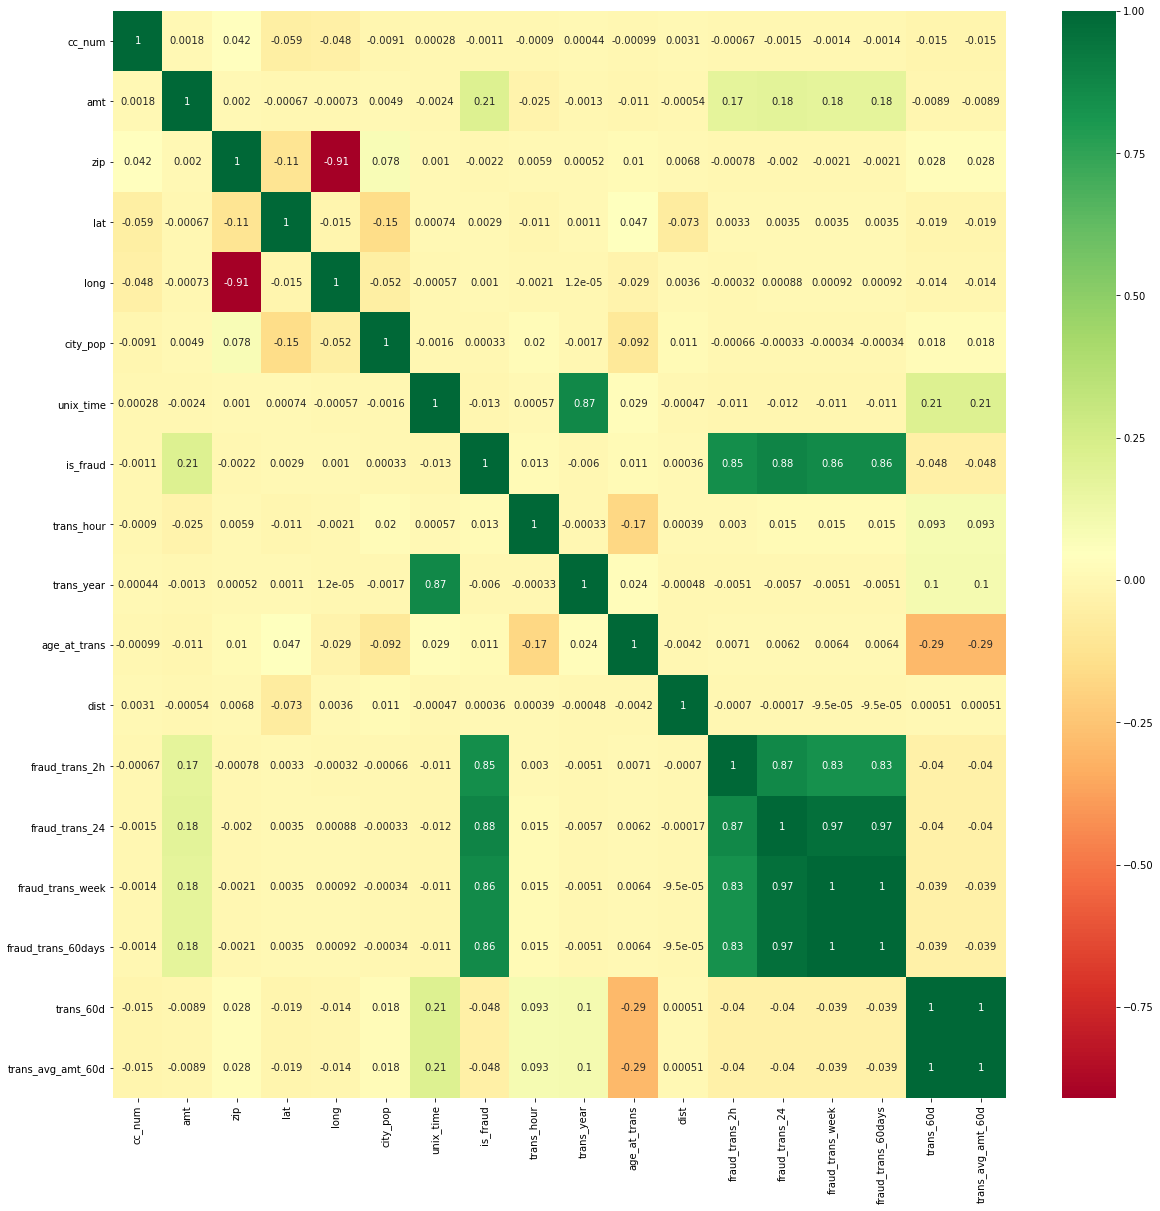

In [29]:
#get correlations of each features in dataset
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

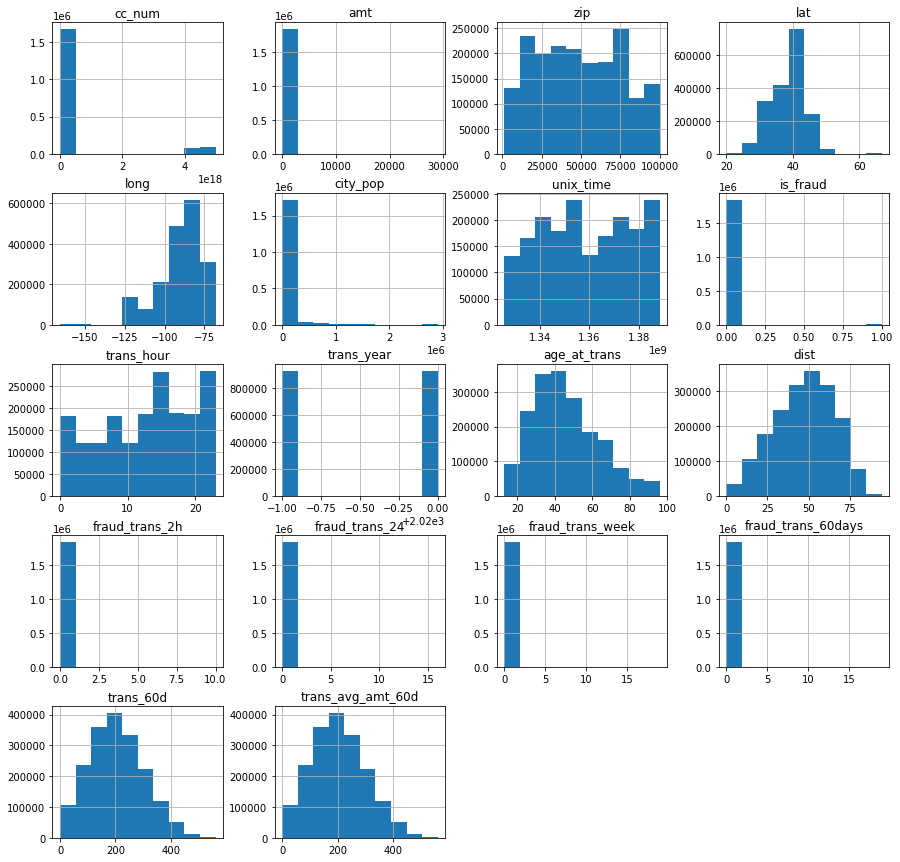

In [30]:
#visual representation of the data using histograms 
df.hist(figsize = (15, 15))
plt.show()

0    1842743
1       9651
Name: is_fraud, dtype: int64


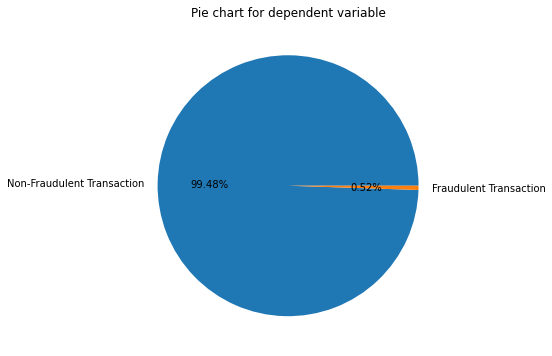

In [31]:
plt.figure(figsize=(6,6))
label = ['Non-Fraudulent Transaction','Fraudulent Transaction']
plt.pie(df['is_fraud'].value_counts(),labels=label, autopct='%0.2f%%')
plt.title('Pie chart for dependent variable')
print( df['is_fraud'].value_counts());

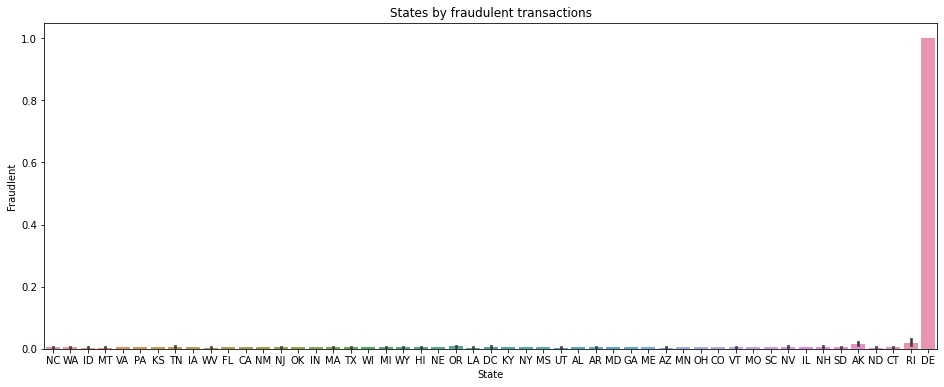

In [32]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x = 'state',y = 'is_fraud', data = df)
ax.set_xlabel('State')
ax.set_ylabel('Fraudlent')
ax.set_title('States by fraudulent transactions')
plt.show()

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


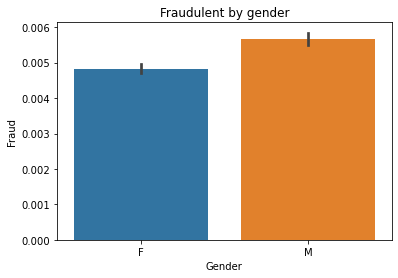

In [33]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(df.gender, df['is_fraud'])
ax.set_xlabel('Gender')
ax.set_ylabel('Fraud')
ax.set_title('Fraudulent by gender')
plt.show();

In [34]:
df_fraud=df[df['is_fraud'].isin([1])]
df_fraud.head()

cc_num                          merchant       category  \
2449    4613314721966            fraud_Rutherford-Mertz    grocery_pos   
2472  340187018810220  fraud_Jenkins, Hauck and Friesen  gas_transport   
2523  340187018810220            fraud_Goodwin-Nitzsche    grocery_pos   
2546    4613314721966            fraud_Erdman-Kertzmann  gas_transport   
2553  340187018810220                fraud_Koepp-Parker    grocery_pos   

         amt  first    last gender                     street           city  \
2449  281.06  Jason  Murphy      M  542 Steve Curve Suite 011  Collettsville   
2472   11.52  Misty    Hart      F  27954 Hall Mill Suite 575    San Antonio   
2523  276.31  Misty    Hart      F  27954 Hall Mill Suite 575    San Antonio   
2546    7.03  Jason  Murphy      M  542 Steve Curve Suite 011  Collettsville   
2553  275.73  Misty    Hart      F  27954 Hall Mill Suite 575    San Antonio   

     state  ...  trans_hour  trans_year  age_at_trans       dist  \
2449    NC  ...           1        2019          30.0  42.815856   
2472    TX  ...           1        2019          58.0  48.685374   
2523    TX  ...           3        2019          58.0  25.466054   
2546    NC  ...           3        2019          30.0  21.202442   
2553    TX  ...           3        2019          58.0  27.451350   

     fraud_trans_2h fraud_trans_24  fraud_trans_week  fraud_trans_60days  \
2449            1.0            5.0               8.0                 8.0   
2472            2.0            6.0               7.0                 7.0   
2523            1.0            1.0               1.0                 1.0   
2546            1.0            1.0               1.0                 1.0   
2553            2.0            2.0               2.0                 2.0   

     trans_60d trans_avg_amt_60d  
2449       1.0               1.0  
2472       1.0               1.0  
2523       1.0               1.0  
2546       1.0               1.0  
2553       1.0               1.0  

[5 rows x 31 columns]

In [35]:
df_fraud['full_name'] = df_fraud[['first','last']].apply(lambda x: ' '.join(x), axis=1);

<ipython-input-35-21bde7a81bac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraud['full_name'] = df_fraud[['first','last']].apply(lambda x: ' '.join(x), axis=1);


C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


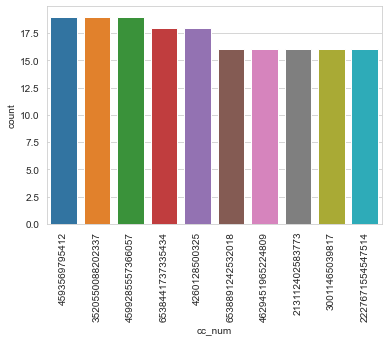

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


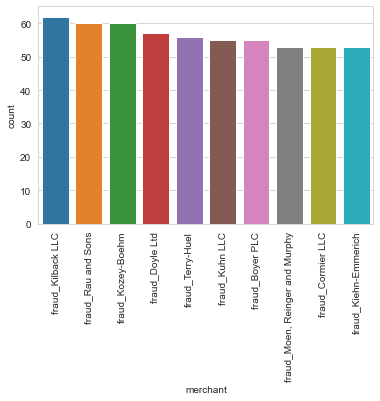

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


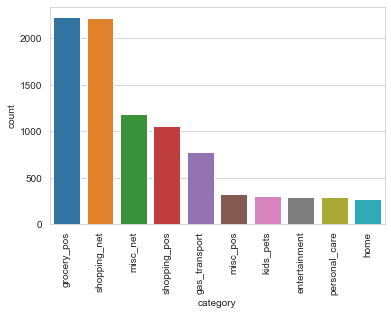

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


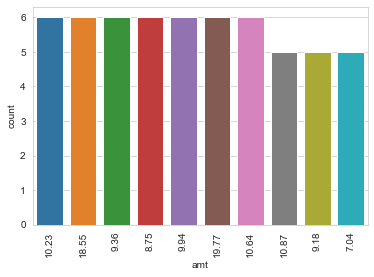

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


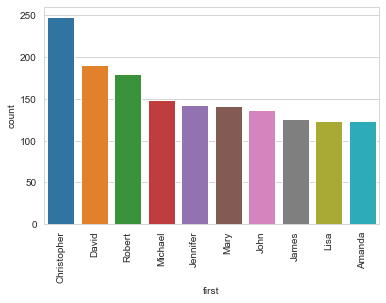

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


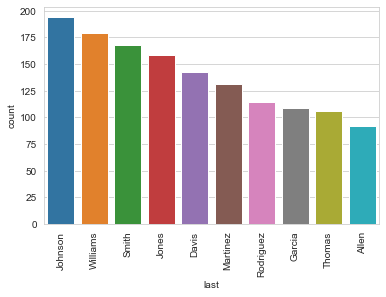

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


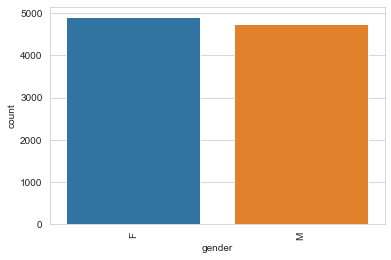

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


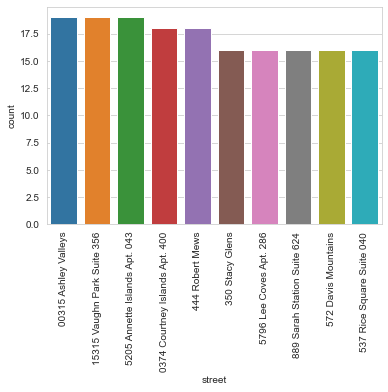

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


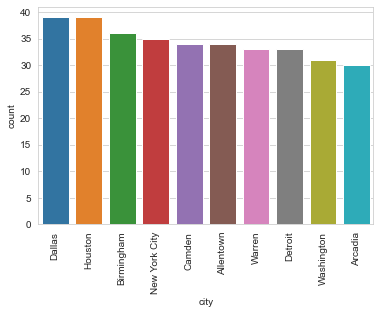

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


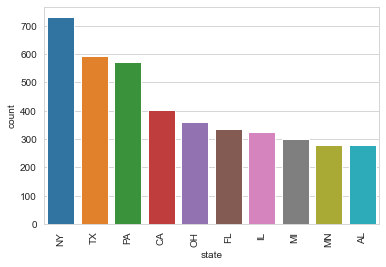

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


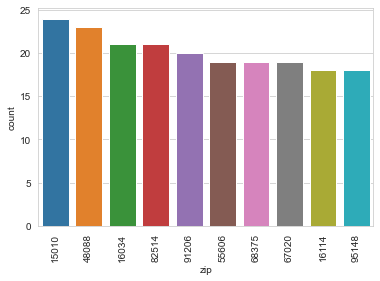

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


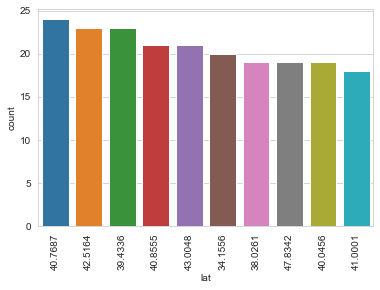

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


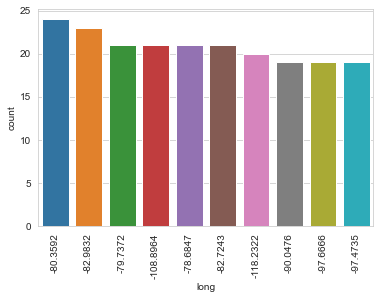

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


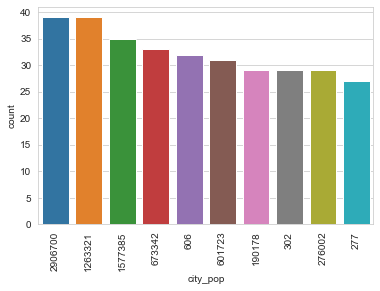

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


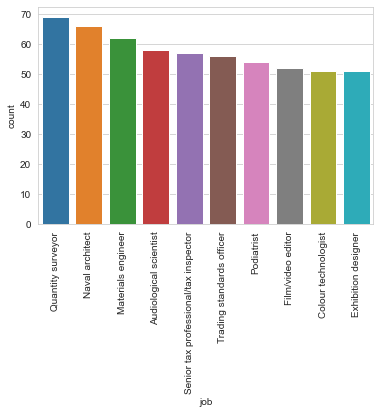

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


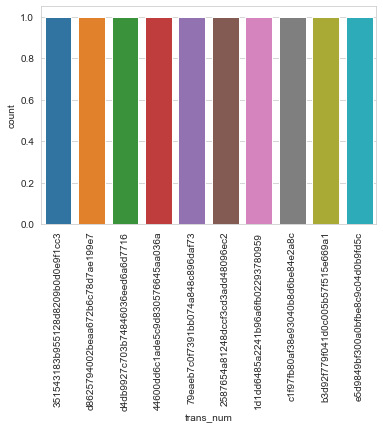

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


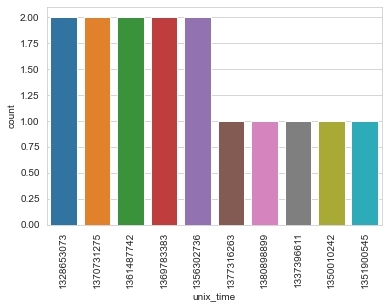

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


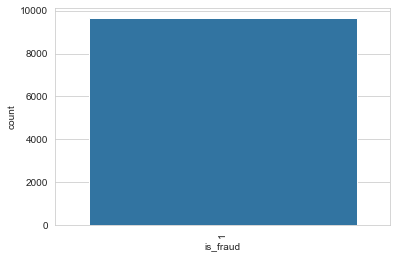

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


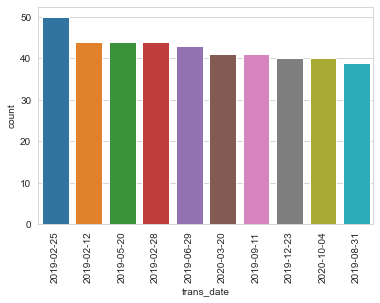

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


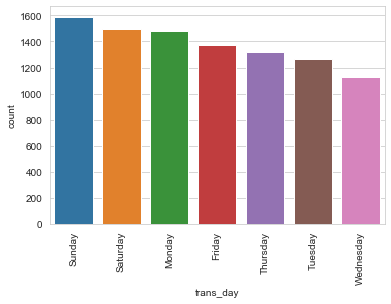

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


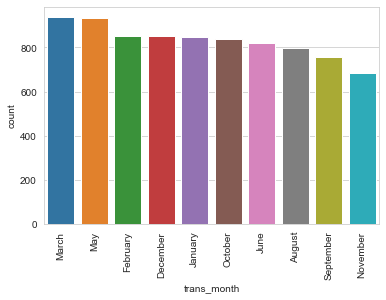

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


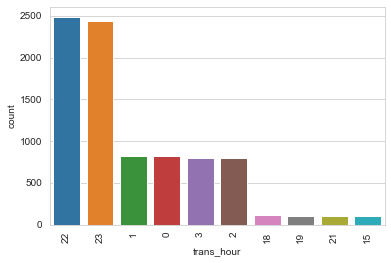

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


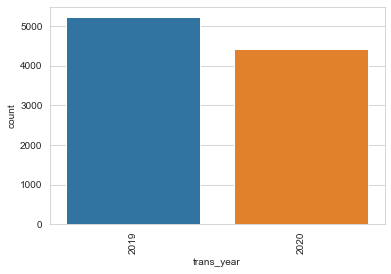

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


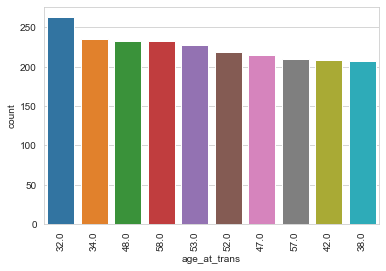

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


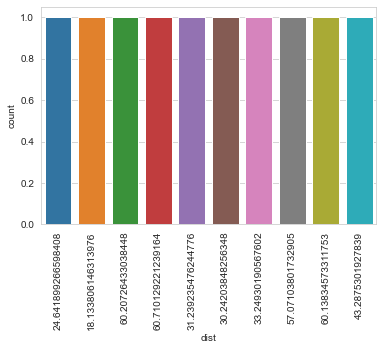

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


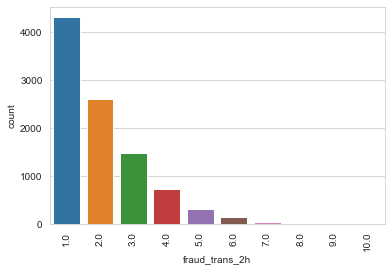

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


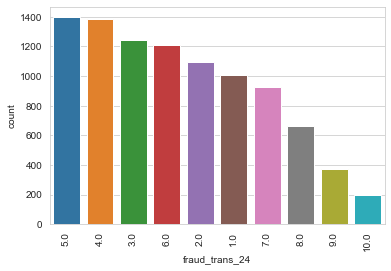

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


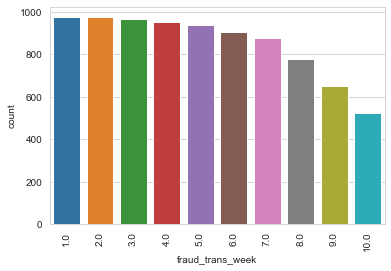

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


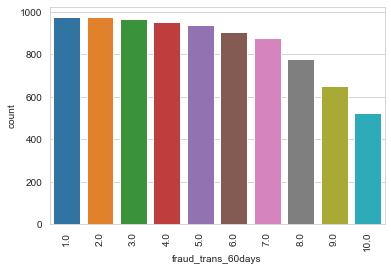

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


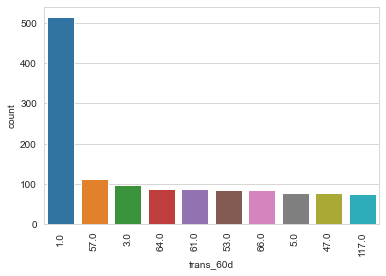

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


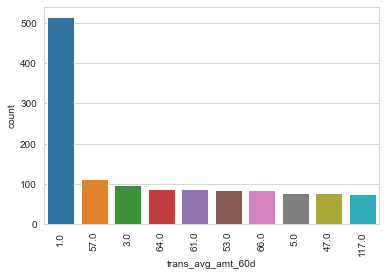

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


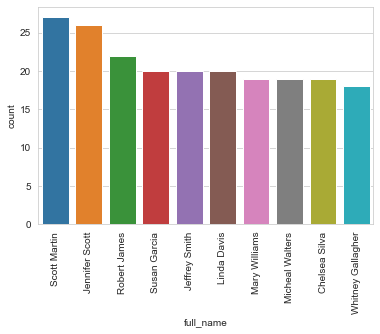

In [36]:
for c in df_fraud:
    sns.set_style("whitegrid")
    sns.countplot((df_fraud[c]), order=df_fraud[c].value_counts().iloc[:10].index)
    plt.xticks(rotation = 90)
    plt.show();

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


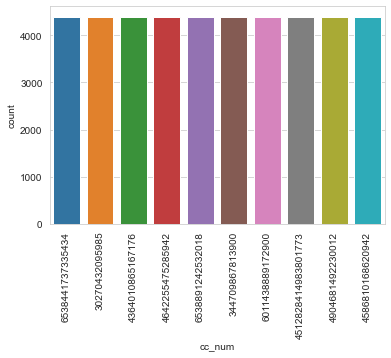

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


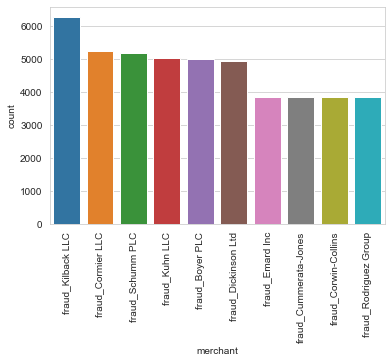

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


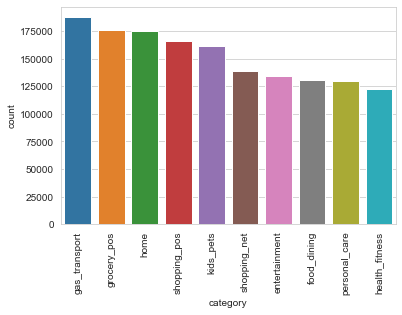

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


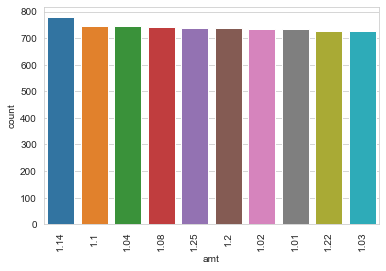

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


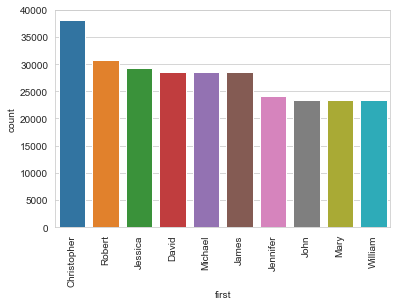

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


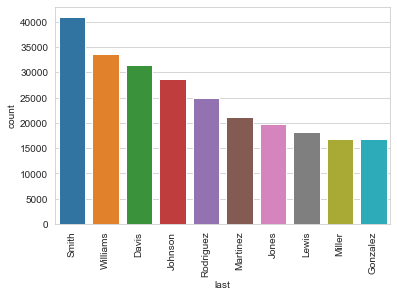

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


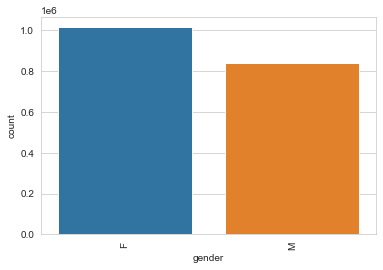

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


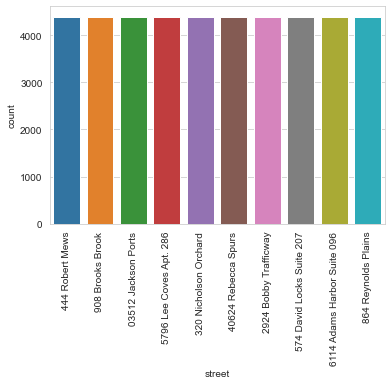

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


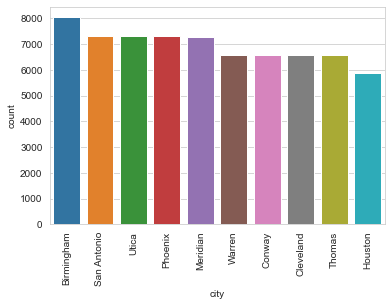

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


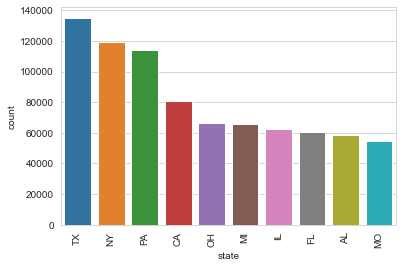

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


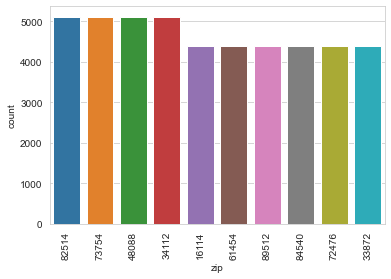

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


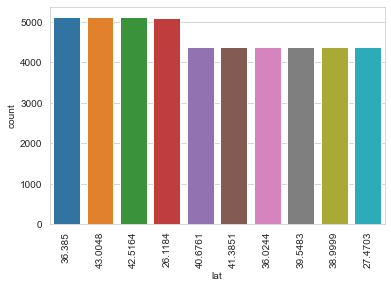

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


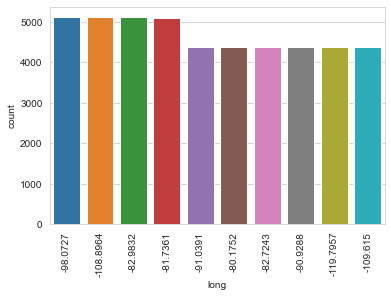

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


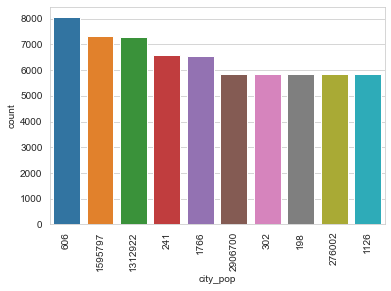

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


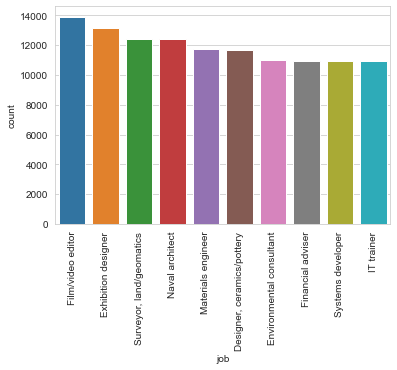

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


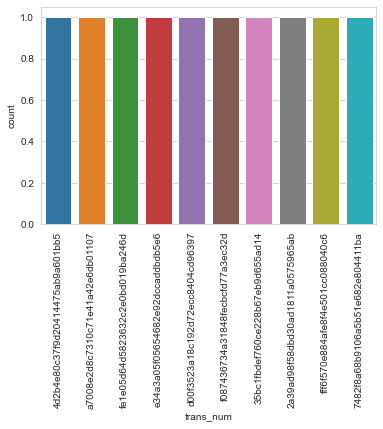

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


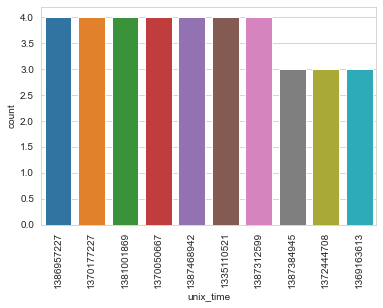

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


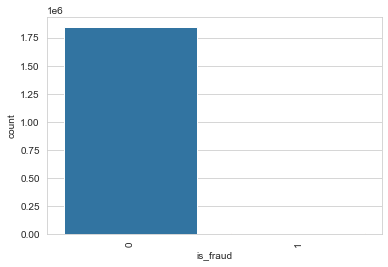

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


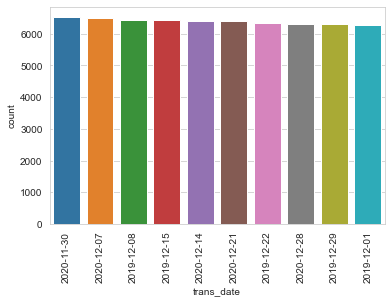

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


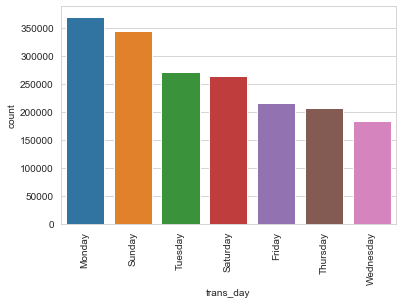

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


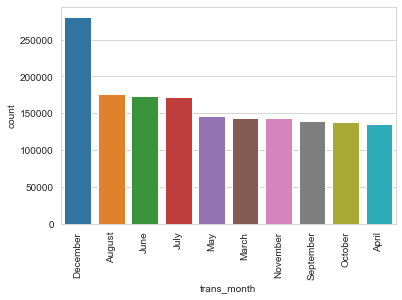

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


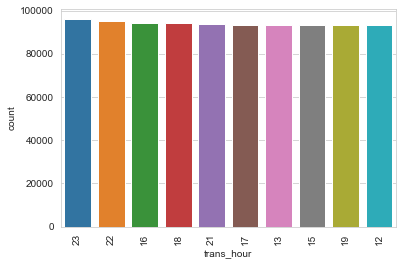

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


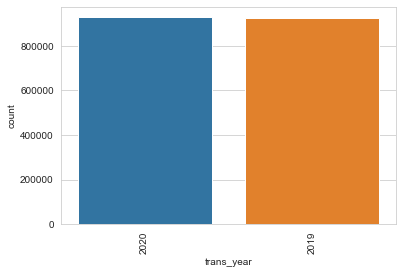

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


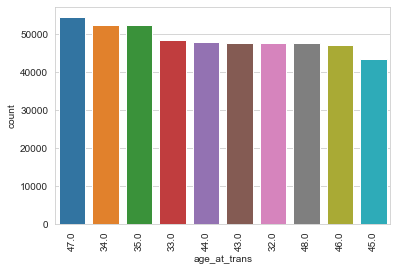

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


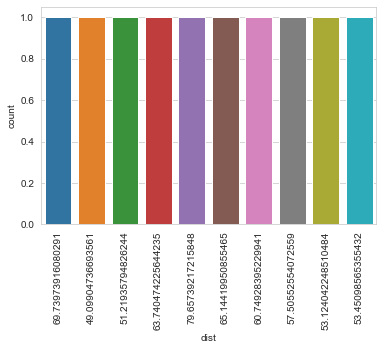

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


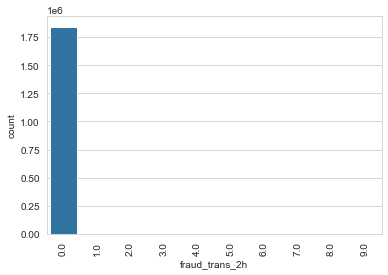

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


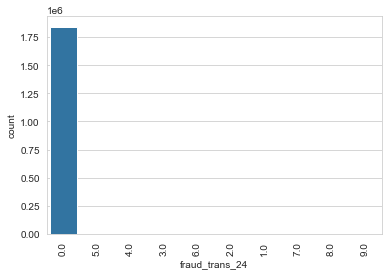

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


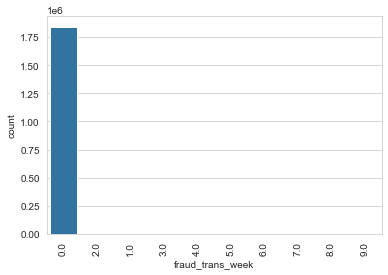

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


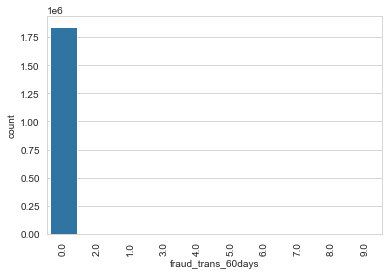

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


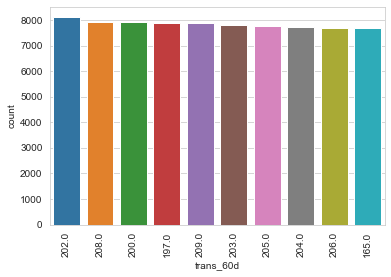

C:\Users\conta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


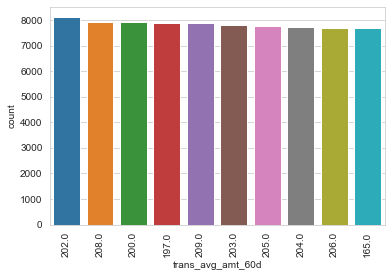

In [37]:
for c in df:
    sns.set_style("whitegrid")
    sns.countplot((df[c]), order=df[c].value_counts().iloc[:10].index)
    plt.xticks(rotation = 90)
    plt.show();

In [38]:
import plotly.express as px
fig = px.scatter_mapbox(df_fraud, lat="lat", lon="long", hover_name="city",
                         zoom=3, height=500,
                         color="is_fraud",  color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Some insights from the visualization: 
- ## There are much more no-fraud transaction than fraud transaction this meaning that data is imbalanced. 
- ## In the DE state, 100% transactions are fraudulent.
- ## The top 3 high fraud categories: shopping net, misc net, grocery pos.
- ## In fraud transactions data set females slightly greater than males.
- ## The top 3 fraud Merchants: Kilback LLC, Kozey-Boehm, Rau and Sons.
- ## The top 3 fraud Cities: Houston, Dallas, Birmingham.
- ## The top 3 fraud States: NY, TX, PA.
- ## The top 3 fraud Zip codes: "15010", "48088", "16034".
- ## The top 3 fraud Jobs: Quanitity surveyor, Naval architect, Materials engeneer.
- ## The top 3 fraud Days: Sunday, Saturday and Monday.
- ## The top 3 fraud Months: March, May, February.
- ## The top fraud hours: 10pm and 11pm.
- ## The top fraud age at the moment of transactions are from 20-50
- ## The top 3 fraud Names: Scott Martin, Jennifer Scott, Robert James

In [39]:
df.nunique()

cc_num                    999
merchant                  693
category                   14
amt                     60616
first                     355
last                      486
gender                      2
street                    999
city                      906
state                      51
zip                       985
lat                       983
long                      983
city_pop                  891
job                       497
trans_num             1852394
unix_time             1819583
is_fraud                    2
trans_date                730
trans_day                   7
trans_month                12
trans_hour                 24
trans_year                  2
age_at_trans               84
dist                  1852394
fraud_trans_2h             11
fraud_trans_24             17
fraud_trans_week           20
fraud_trans_60days         20
trans_60d                 549
trans_avg_amt_60d         549
dtype: int64

In [40]:
#df[['job 1','job 2']]=df['job'].str.split(',', expand=True)

In [41]:
#df['job 2'].fillna(df['job 1'],inplace=True)



In [42]:
df_job = df[df['is_fraud']== 1]
df_job

cc_num                             merchant       category  \
2449        4613314721966               fraud_Rutherford-Mertz    grocery_pos   
2472      340187018810220     fraud_Jenkins, Hauck and Friesen  gas_transport   
2523      340187018810220               fraud_Goodwin-Nitzsche    grocery_pos   
2546        4613314721966               fraud_Erdman-Kertzmann  gas_transport   
2553      340187018810220                   fraud_Koepp-Parker    grocery_pos   
...                   ...                                  ...            ...   
1813872  2242176657877538      fraud_Willms, Kris and Bergnaum   shopping_pos   
1813949  2242176657877538                       fraud_Kuhn LLC   shopping_pos   
1814016  2242176657877538  fraud_Mosciski, Ziemann and Farrell   shopping_net   
1814204  2242176657877538                   fraud_Bauch-Raynor    grocery_pos   
1814246  2242176657877538           fraud_Jaskolski-Vandervort       misc_net   

             amt   first    last gender                       street  \
2449      281.06   Jason  Murphy      M    542 Steve Curve Suite 011   
2472       11.52   Misty    Hart      F    27954 Hall Mill Suite 575   
2523      276.31   Misty    Hart      F    27954 Hall Mill Suite 575   
2546        7.03   Jason  Murphy      M    542 Steve Curve Suite 011   
2553      275.73   Misty    Hart      F    27954 Hall Mill Suite 575   
...          ...     ...     ...    ...                          ...   
1813872  1041.51  Travis  Daniel      M  1327 Rose Causeway Apt. 610   
1813949   868.09  Travis  Daniel      M  1327 Rose Causeway Apt. 610   
1814016  1039.42  Travis  Daniel      M  1327 Rose Causeway Apt. 610   
1814204   289.27  Travis  Daniel      M  1327 Rose Causeway Apt. 610   
1814246   766.38  Travis  Daniel      M  1327 Rose Causeway Apt. 610   

                  city state  ...  trans_hour  trans_year  age_at_trans  \
2449     Collettsville    NC  ...           1        2019          30.0   
2472       San Antonio    TX  ...           1        2019          58.0   
2523       San Antonio    TX  ...           3        2019          58.0   
2546     Collettsville    NC  ...           3        2019          30.0   
2553       San Antonio    TX  ...           3        2019          58.0   
...                ...   ...  ...         ...         ...           ...   
1813872      Senatobia    MS  ...          22        2020          61.0   
1813949      Senatobia    MS  ...          22        2020          61.0   
1814016      Senatobia    MS  ...          22        2020          61.0   
1814204      Senatobia    MS  ...          23        2020          61.0   
1814246      Senatobia    MS  ...          23        2020          61.0   

              dist fraud_trans_2h fraud_trans_24  fraud_trans_week  \
2449     42.815856            1.0            5.0               8.0   
2472     48.685374            2.0            6.0               7.0   
2523     25.466054            1.0            1.0               1.0   
2546     21.202442            1.0            1.0               1.0   
2553     27.451350            2.0            2.0               2.0   
...            ...            ...            ...               ...   
1813872   4.312857            1.0            4.0               5.0   
1813949  47.164328            1.0            5.0               6.0   
1814016  22.685790            2.0            6.0               7.0   
1814204  30.307051            3.0            7.0               8.0   
1814246  73.791754            4.0            7.0               9.0   

         fraud_trans_60days trans_60d trans_avg_amt_60d  
2449                    8.0       1.0               1.0  
2472                    7.0       1.0               1.0  
2523                    1.0       1.0               1.0  
2546                    1.0       1.0               1.0  
2553                    2.0       1.0               1.0  
...                     ...       ...               ...  
1813872                 5.0      

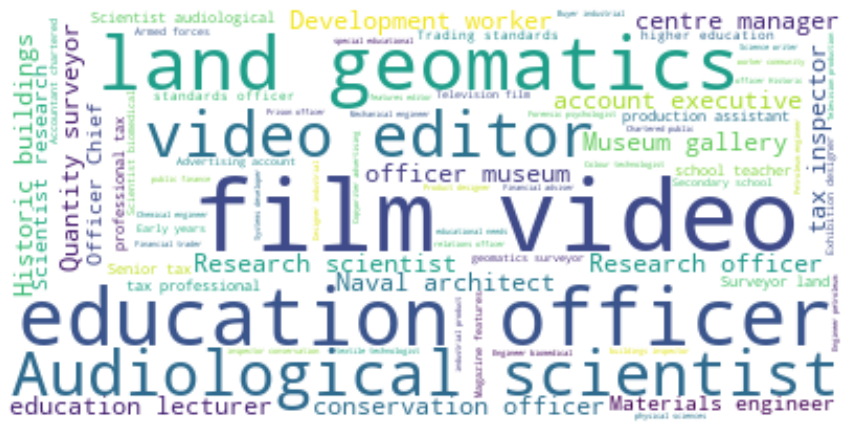

In [43]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df_job.job )
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200,  background_color="white").generate(text)
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [45]:
df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'trans_num', 'unix_time', 'is_fraud', 'trans_date', 'trans_day',
       'trans_month', 'trans_hour', 'trans_year', 'age_at_trans', 'dist',
       'fraud_trans_2h', 'fraud_trans_24', 'fraud_trans_week',
       'fraud_trans_60days', 'trans_60d', 'trans_avg_amt_60d'],
      dtype='object')

In [46]:
#droping unnecessary columns
df.drop(['cc_num', 'merchant', 'city', 'state', 'first', 'last', 'street', 'zip', 'lat', 'long', 'trans_num', 'unix_time', 'trans_date','job'],inplace=True, axis=1)

In [47]:
df['age_at_trans'] = pd.cut(df['age_at_trans'], 
                         bins=[10,20,30,40,50,60,70,1000], 
                         labels=['10-20', '20-30', '30-40', '40-50', '50-60', '60 - 70','70 - Above'])

In [48]:
df['dist'] = pd.cut(df['dist'], 
                         bins=[0,10,20,30,40,50,60,70,80,90,100], 
                         labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60 - 70','70 - 80', '80-90', 'more then 90'])

In [49]:
df.drop(['fraud_trans_2h', 'fraud_trans_24', 'fraud_trans_week', 'fraud_trans_60days', 'trans_60d', 'trans_avg_amt_60d'], axis=1, inplace=True)

In [50]:
df.head()

category     amt gender  city_pop  is_fraud trans_day trans_month  \
0       misc_net    4.97      F      3495         0   Tuesday     January   
1    grocery_pos  107.23      F       149         0   Tuesday     January   
2  entertainment  220.11      M      4154         0   Tuesday     January   
3  gas_transport   45.00      M      1939         0   Tuesday     January   
4       misc_pos   41.96      M        99         0   Tuesday     January   

   trans_hour  trans_year age_at_trans     dist  
0           0        2019        20-30    40-50  
1           0        2019        30-40    10-20  
2           0        2019        50-60  60 - 70  
3           0        2019        50-60    50-60  
4           0        2019        30-40    40-50

In [51]:
df.dist.max()

'more then 90'

In [52]:
df.shape

(1852394, 11)

In [54]:
df.to_csv(r"C:\Users\conta\OneDrive\Desktop\General Assembly\Projects\project-capstone\Credit cards\CleanEDAfraud.csv", index=False)

In [55]:
df['is_fraud'].value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

In [56]:
df_dum=pd.get_dummies(df, columns=['category', 'gender', 'trans_day', 'trans_month', 'trans_hour', 'trans_year', 'age_at_trans'],drop_first=True)

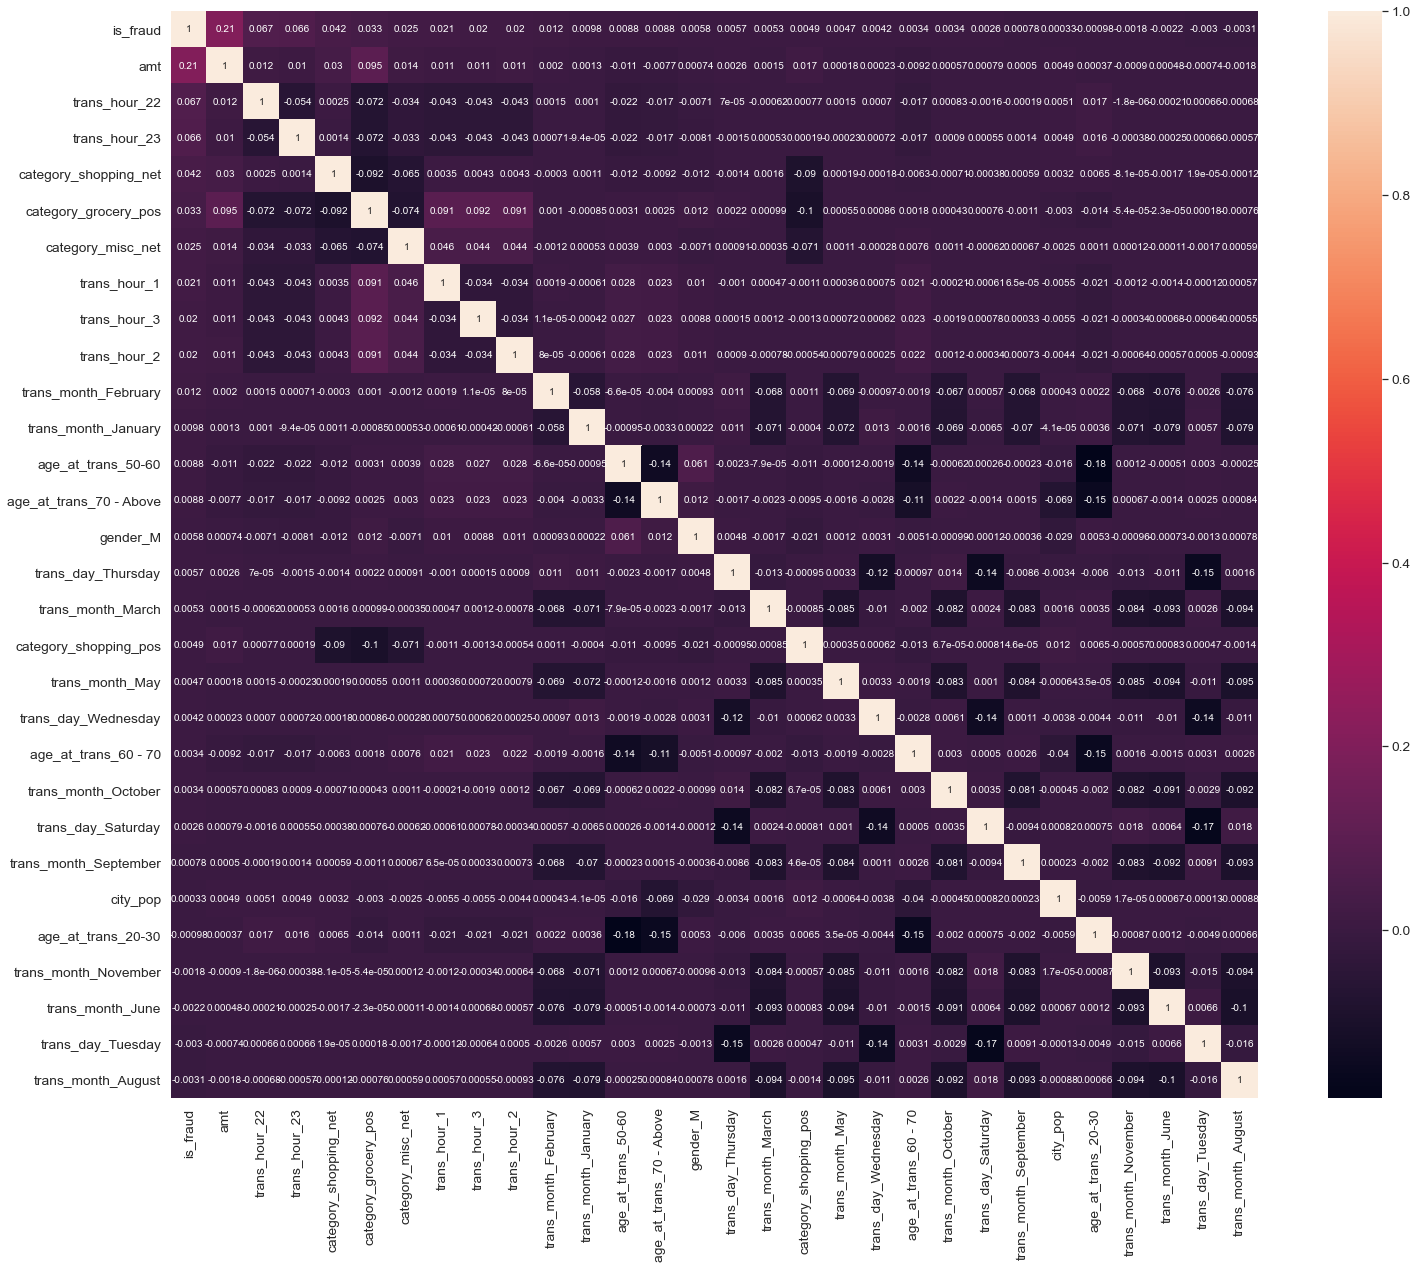

In [57]:
import numpy as np
corr_dum = df_dum.corr()
z = 30
cols_dum = corr_dum.nlargest(z, 'is_fraud')['is_fraud'].index
cm_dum = np.corrcoef(df_dum[cols_dum].values.T)
sns.set(font_scale=1.25)
f, ax_dum = plt.subplots(figsize=(25,20))
hm_dum = sns.heatmap(cm_dum, cbar=True, annot=True, square=True, annot_kws={'size': 10}, yticklabels=cols_dum.values, xticklabels=cols_dum.values)
plt.show()